In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import jinja2
from pycaret.regression import *

In [2]:
#Reading csv file with pandas read_csv and equal it to df1 as variable name
df1 = pd.read_csv('2017.csv')

In [3]:
#Dropping last column which is only contains NAN values then change our variable to df
df = df1.drop('Unnamed: 23', 1)

In [4]:
#checking our dataset first 5 rows
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2017,1,1,0,30,3.7,0,0,0,7,2.4,0,0,0,0,0.367,91.03,145.08,0.87,1020,1.3,310,3.2
1,2017,1,1,1,30,3.3,0,0,0,4,1.9,0,0,0,0,0.365,90.70,134.10,0.87,1020,1.2,309,3.0
2,2017,1,1,2,30,3.0,0,0,0,4,1.5,0,0,0,0,0.362,89.67,122.82,0.87,1020,1.2,305,2.6
3,2017,1,1,3,30,2.7,0,0,0,4,1.0,0,0,0,0,0.358,88.72,111.63,0.87,1021,1.2,295,2.2
4,2017,1,1,4,30,2.4,0,0,0,4,0.6,0,0,0,0,0.353,87.90,100.81,0.87,1021,1.2,280,1.9


In [5]:
#checking our dataset last 5 rows to be sure it sorted as hourly last rows contains 31/12/2017 23.30
df.tail()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
8755,2017,12,31,19,30,6.6,0,0,0,0,5.1,0,0,0,0,0.367,90.03,142.62,0.11,1016,1.1,220,2.3
8756,2017,12,31,20,30,6.5,0,0,0,0,5.1,0,0,0,0,0.363,90.72,152.84,0.11,1017,1.2,225,2.4
8757,2017,12,31,21,30,6.5,0,0,0,0,5.1,0,0,0,0,0.358,90.81,160.35,0.11,1016,1.2,228,2.6
8758,2017,12,31,22,30,6.4,0,0,0,0,5.1,0,0,0,0,0.352,91.40,161.30,0.11,1016,1.3,231,2.8
8759,2017,12,31,23,30,6.3,0,0,0,0,5.0,0,0,0,0,0.348,91.50,154.91,0.11,1016,1.3,233,2.9


In [6]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

Text(0.5, 1.0, 'Missing value in the dataset')

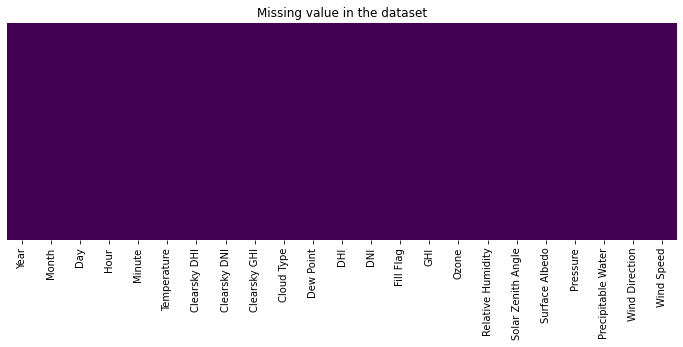

In [7]:
#Visualize summary of null values.
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

In [8]:
df.shape

(8760, 23)

In [9]:
#  We removed 0 values of DNI our target value, its pointless to keep them, cause we dont need night times when sun light doesnt exist
df = df_no_zero = df.loc[df['DNI']!= 0 ]
assert len(df_no_zero['DNI'])==len(df_no_zero['GHI'])

In [10]:
#Our data consist 3167 rows and 23 columns
df.shape 

(3167, 23)

In [11]:
#we created loop which is get row's year,month,day,hour and minute columns and make 1 column name is date_time
cols = ["Year","Month","Day","Hour","Minute"]
df["date_time"] = df[cols].apply(lambda row: "-".join(row.values.astype(str)), axis=1)

In [12]:
#Giving date_time column format
#dropping our 5 columns cause we already got column name date_time contain this info
#setting date_time index
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d-%H-%M')
df=df.drop(["Year","Month","Day","Hour","Minute"],axis = 1)
df=df.set_index('date_time')

In [13]:
df.sort_index(axis = 1)

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,DHI,DNI,Dew Point,Fill Flag,GHI,Ozone,Precipitable Water,Pressure,Relative Humidity,Solar Zenith Angle,Surface Albedo,Temperature,Wind Direction,Wind Speed
date_time,,,,,,,,,,,,,,,,,,
2017-01-01 09:30:00,130,720,439,4,186,170,-0.1,0,259,0.335,1.0,1021,75.46,64.60,0.87,3.8,229,2.6
2017-01-01 10:30:00,128,738,449,4,167,354,-0.1,0,320,0.334,0.9,1021,74.36,64.24,0.87,4.1,226,2.7
2017-01-01 11:30:00,115,720,398,4,151,324,0.0,0,278,0.333,0.9,1020,73.58,66.83,0.87,4.3,223,2.8
2017-01-01 12:30:00,91,672,298,4,113,14,0.0,0,118,0.331,0.8,1020,73.54,72.05,0.87,4.3,222,2.8
2017-01-02 06:30:00,42,528,122,0,42,528,-0.9,0,122,0.296,0.6,1020,82.48,81.36,0.12,1.8,194,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 09:30:00,86,750,406,7,185,148,8.6,0,249,0.321,2.1,1006,78.19,64.79,0.12,12.3,169,4.6
2017-12-30 08:30:00,79,721,350,7,143,22,8.1,0,151,0.341,1.9,1006,79.58,67.96,0.11,11.5,140,1.4
2017-12-30 09:30:00,85,760,409,7,183,205,8.4,0,270,0.340,1.9,1005,77.80,64.74,0.11,12.2,120,1.3


In [14]:
#lets check our columns
df.columns

Index(['Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [15]:
df.shape

(3167, 18)

In [16]:
'''DNI is Direct Normal Irradiance while GHI and DHI are diffused
They measured by different sensor DNI measured by Pyrheliometer while other two measured by pyranometer
 Cause of reasons, we'll drop Clearsky DNI (before we start) almost identical with DNI column.
 '''

"DNI is Direct Normal Irradiance while GHI and DHI are diffused\nThey measured by different sensor DNI measured by Pyrheliometer while other two measured by pyranometer\n Cause of reasons, we'll drop Clearsky DNI (before we start) almost identical with DNI column.\n "

In [17]:
df = df.drop('Clearsky DNI', 1)

In [18]:
df.shape

(3167, 17)

In [19]:
#Describe dataframe
df.describe()

,Temperature,Clearsky DHI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
count,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000
mean,19.187528,116.820019,505.155352,1.431955,12.519230,149.421219,473.062835,0.173350,428.693716,0.316864,66.489795,55.844026,0.145122,1012.403221,2.108810,133.063783,3.154657
std,6.791943,55.232694,279.651610,2.271600,5.849655,98.009137,308.579565,0.725371,268.163288,0.032649,11.604468,19.024250,0.080748,5.258753,0.852973,106.961068,1.611753
min,0.200000,4.000000,4.000000,0.000000,-5.700000,3.000000,1.000000,0.000000,4.000000,0.256000,24.960000,18.380000,0.100000,998.000000,0.400000,0.000000,0.400000
25%,14.000000,80.000000,272.500000,0.000000,8.200000,82.000000,171.000000,0.000000,201.000000,0.290000,58.340000,40.330000,0.130000,1009.000000,1.500000,42.000000,1.900000
50%,19.700000,113.000000,512.000000,0.000000,13.000000,124.000000,502.000000,0.000000,392.000000,0.311000,66.070000,57.480000,0.140000,1012.000000,2.000000,77.000000,2.900000
75%,25.000000,149.000000,752.000000,2.000000,17.500000,187.000000,768.000000,0.000000,644.000000,0.343000,74.860000,70.825000,0.140000,1015.000000,2.700000,229.000000,4.200000
max,34.200000,414.000000,996.000000,12.000000,24.700000,473.000000,976.000000,5.000000,996.000000,0.418000,98.930000,88.990000,0.870000,1030.000000,4.400000,360.000000,7.800000


Text(0, 0.5, 'DNI W/m2')

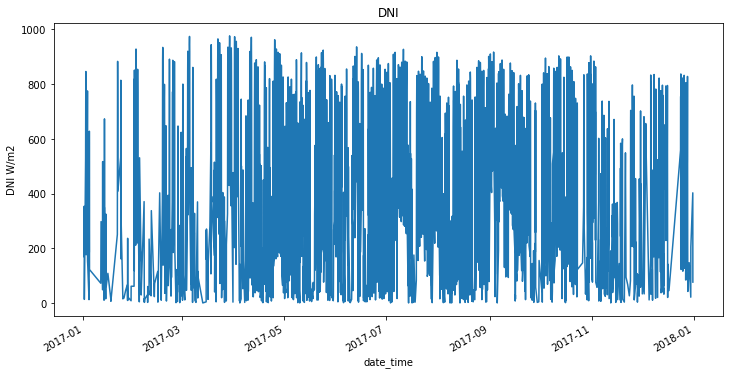

In [20]:
#preview of our target through whole year
df['DNI'].plot(figsize=(12,6), title= 'DNI')
plt.ylabel("DNI W/m2")

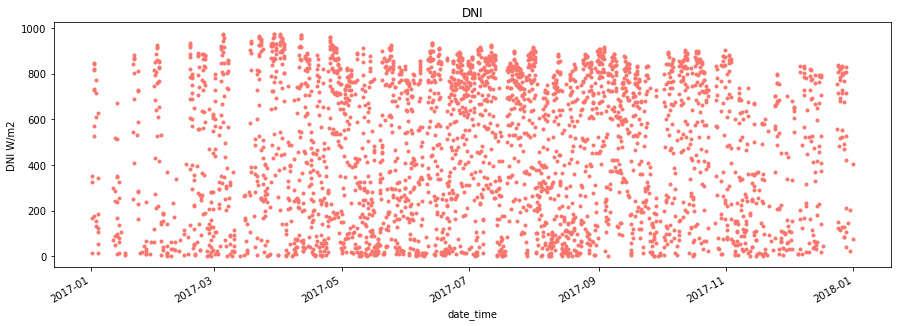

In [21]:
#same preview with dots and different color for  clearify our vision
color_pal = ['#F8766D','#D39200','#93AA00','#00BA38','#00C19F','#00B9E3','#619CFF','#DB72FB']
df['DNI'].plot(style='.',figsize=(15,5),color=color_pal[0],title='DNI')
plt.ylabel("DNI W/m2")
plt.show()

<AxesSubplot:>

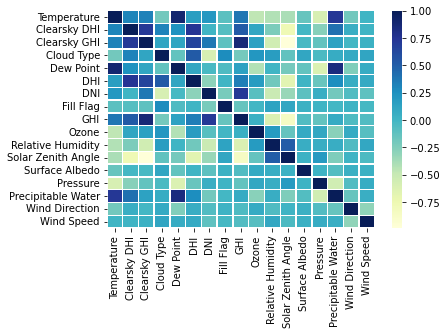

In [22]:
#Correlation between all features
corr = df.corr()
sns.heatmap(corr,cmap="YlGnBu", linewidths=.5)

In [23]:
''' Explained relationship GHI and DNI in paper;
In theory we can find GHI with equation which include DNI and DHI
Global Horizontal Irradiance (GHI) = Direct Normal Irradiance (DNI)* cos(solar zenith angle)+Diffused Horizontal Irradiance (DHI)
'''

' Explained relationship GHI and DNI in paper;\nIn theory we can find GHI with equation which include DNI and DHI\nGlobal Horizontal Irradiance (GHI) = Direct Normal Irradiance (DNI)* cos(solar zenith angle)+Diffused Horizontal Irradiance (DHI)\n'

<AxesSubplot:>

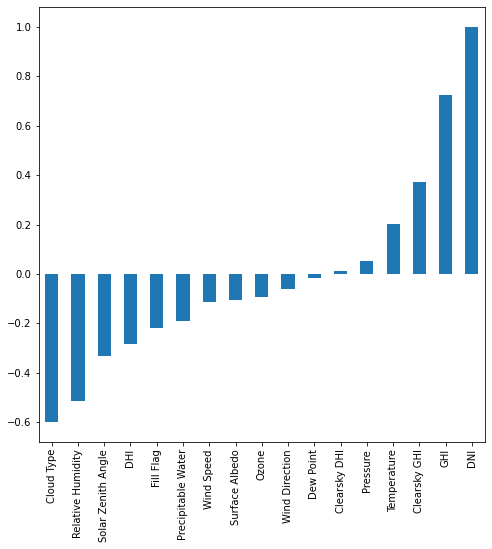

In [24]:
df.corr()["DNI"].sort_values().plot(kind="bar", figsize=(8,8))

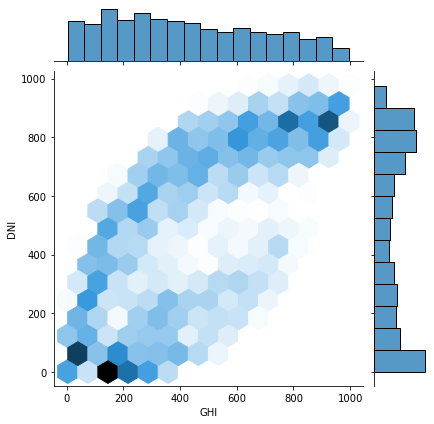

In [25]:
#so pattern between GHI and DHI with hex plot.
_ = sns.jointplot(x = "GHI", y="DNI", data=df, kind = 'hex')

In [26]:
'''Every data points for every columns
If you can't see it, I don't know any other solution, download it as an image and inspect it'''

"Every data points for every columns\nIf you can't see it, I don't know any other solution, download it as an image and inspect it"

In [27]:
#I used pycaret to try many different combinations as possible
#Its using Sklearn library, Used sklearn library too but this is last version for submit

In [28]:
#We divide dataset for validation. 5% of dataset will be not seen by model until predict phase
data = df.sample(frac=0.95, random_state=123)
data_unseen = df.drop(data.index)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3009, 17)
Unseen Data For Predictions: (158, 17)


In [29]:
#Setuping our dataset, adjusting K-fold(cross-validation, if there is null-value imputer can be use)
#If there is outliers, can be removed, if we want to unsupervised learning Can use PCA method for reduce dimensions..
#Our dataset as data, and target value is DNI. session_id is fixed, since we want evaluate model in same condition.
reg = setup(data=data,
           target='DNI', session_id = 123)

,Description,Value
0,session_id,123
1,Target,DNI
2,Original Data,"(3009, 17)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2106, 28)"


In [30]:
#comparing models 
best = compare_models(exclude=['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,13.7439,473.4550,21.5305,0.9949,0.3164,0.2548,0.5920
lightgbm,Light Gradient Boosting Machine,16.3686,651.1687,25.3546,0.9930,0.2831,0.2078,0.1130
et,Extra Trees Regressor,15.9628,757.5132,27.0836,0.9919,0.3140,0.2435,0.0800
xgboost,Extreme Gradient Boosting,18.8141,859.7828,29.0675,0.9908,0.2988,0.2268,0.0790
rf,Random Forest Regressor,19.5191,1012.6366,31.6427,0.9892,0.2992,0.2307,0.1120
gbr,Gradient Boosting Regressor,25.5963,1304.2669,35.9348,0.9861,0.4519,0.5271,0.0560
knn,K Neighbors Regressor,26.6680,1479.9056,38.3764,0.9843,0.3288,0.2782,0.0070
dt,Decision Tree Regressor,30.0851,2234.3003,46.6767,0.9760,0.3400,0.2143,0.0070
ada,AdaBoost Regressor,65.0598,6092.0926,77.9672,0.9354,0.8308,1.8570,0.0340
lr,Linear Regression,62.5444,6655.7842,81.5215,0.9293,0.7328,1.3586,0.4190


In [31]:
#Since catboost is most succesfull We'll decide use it.
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.0028,544.1053,23.3261,0.9940,0.3277,0.2638
1,12.0714,342.4509,18.5054,0.9965,0.2448,0.1747
2,11.3753,346.9230,18.6259,0.9966,0.3773,0.3437
3,14.7644,555.6776,23.5728,0.9936,0.2465,0.1493
4,12.5475,339.8091,18.4339,0.9966,0.3490,0.3038
5,14.9840,658.5607,25.6624,0.9933,0.3270,0.2075
6,11.8132,307.3422,17.5312,0.9968,0.2901,0.2926
7,14.8835,465.0855,21.5658,0.9950,0.3067,0.2610
8,16.0958,734.2885,27.0978,0.9920,0.3656,0.2767
9,13.9017,440.3075,20.9835,0.9949,0.3291,0.2748


In [32]:
#tune model for each fold
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.4400,1181.2266,34.3690,0.9870,0.4990,0.5529
1,23.4136,999.1782,31.6098,0.9899,0.4088,0.3573
2,20.3063,770.8780,27.7647,0.9924,0.4226,0.4038
3,26.3102,1337.7683,36.5755,0.9846,0.2966,0.2094
4,24.3101,1118.7985,33.4484,0.9887,0.4120,0.4244
5,27.3620,1529.3582,39.1070,0.9845,0.4140,0.3734
6,25.5744,1416.1979,37.6324,0.9855,0.4599,0.5022
7,23.5448,985.9716,31.4002,0.9893,0.4677,0.5912
8,26.7664,1527.2978,39.0807,0.9834,0.5467,0.7700
9,27.1189,1448.8749,38.0641,0.9834,0.4517,0.4667


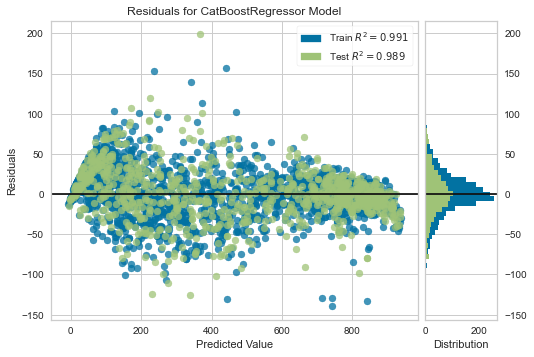

In [33]:
#plot residuals
plot_model(tuned_catboost)

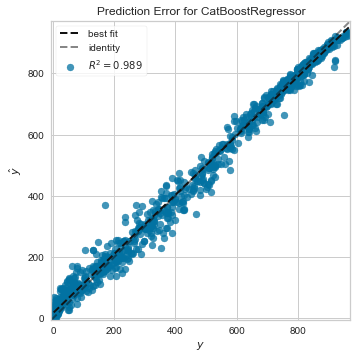

In [34]:
#plot R2 error, how its fit
plot_model(tuned_catboost, plot = 'error')

In [35]:
#this allows see all different of plots
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
#After tuning how it works on test
predict_model(tuned_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,23.5830,1062.8879,32.6020,0.9888,0.4014,0.3997


,Temperature,Clearsky DHI,Clearsky GHI,Dew Point,DHI,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,...,Cloud Type_6,Cloud Type_7,Cloud Type_8,Cloud Type_9,Fill Flag_0,Fill Flag_1,Fill Flag_3,Fill Flag_5,DNI,Label
0,21.000000,103.0,642.0,11.3,103.0,642.0,0.277,54.009998,51.360001,0.13,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,863.0,866.983285
1,9.900000,68.0,311.0,5.5,132.0,156.0,0.325,74.309998,70.500000,0.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,72.0,102.718482
2,16.100000,89.0,266.0,13.0,89.0,266.0,0.373,81.599998,70.959999,0.16,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,543.0,567.676880
3,29.700001,102.0,504.0,17.9,102.0,504.0,0.284,49.150002,57.040001,0.14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,739.0,742.558581
4,23.500000,110.0,992.0,15.4,110.0,992.0,0.328,60.490002,19.200001,0.14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,935.0,912.065313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,8.400000,145.0,227.0,4.1,145.0,227.0,0.362,74.139999,72.269997,0.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,271.0,371.632477
899,21.799999,154.0,678.0,12.8,230.0,239.0,0.298,56.709999,46.110001,0.14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,19.804678
900,9.100000,75.0,180.0,4.5,75.0,180.0,0.389,73.029999,76.550003,0.14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,450.0,478.502640
901,17.600000,119.0,548.0,8.2,119.0,548.0,0.360,54.000000,55.110001,0.13,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,750.0,749.682917


In [37]:
#finalizing data for fit on whole dataset
final_catboost = finalize_model(tuned_catboost)

In [38]:
#how it works on both test and train
predict_model(final_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,19.6293,733.2416,27.0784,0.9922,0.3625,0.3279


,Temperature,Clearsky DHI,Clearsky GHI,Dew Point,DHI,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,...,Cloud Type_6,Cloud Type_7,Cloud Type_8,Cloud Type_9,Fill Flag_0,Fill Flag_1,Fill Flag_3,Fill Flag_5,DNI,Label
0,21.000000,103.0,642.0,11.3,103.0,642.0,0.277,54.009998,51.360001,0.13,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,863.0,868.529648
1,9.900000,68.0,311.0,5.5,132.0,156.0,0.325,74.309998,70.500000,0.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,72.0,97.325607
2,16.100000,89.0,266.0,13.0,89.0,266.0,0.373,81.599998,70.959999,0.16,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,543.0,558.057020
3,29.700001,102.0,504.0,17.9,102.0,504.0,0.284,49.150002,57.040001,0.14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,739.0,743.618803
4,23.500000,110.0,992.0,15.4,110.0,992.0,0.328,60.490002,19.200001,0.14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,935.0,917.553402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,8.400000,145.0,227.0,4.1,145.0,227.0,0.362,74.139999,72.269997,0.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,271.0,348.714453
899,21.799999,154.0,678.0,12.8,230.0,239.0,0.298,56.709999,46.110001,0.14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,35.797414
900,9.100000,75.0,180.0,4.5,75.0,180.0,0.389,73.029999,76.550003,0.14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,450.0,477.800506
901,17.600000,119.0,548.0,8.2,119.0,548.0,0.360,54.000000,55.110001,0.13,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,750.0,758.399386


In [39]:
# we divided data as you know 5% for validate. So we can see how perform our model on unseen dataset.
#Label represent predict values and DNI is target so i decided save it as csv and make table.
#But lets glance at data frame
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head(n=15)

,Temperature,Clearsky DHI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Label
date_time,,,,,,,,,,,,,,,,,,
2017-01-01 12:30:00,4.3,91,298,4,0.0,113,14,0,118,0.331,73.54,72.05,0.87,1020,0.8,222,2.8,53.000194
2017-01-03 10:30:00,7.3,95,435,2,2.7,191,154,0,259,0.292,72.34,64.03,0.12,1016,1.0,210,4.9,170.466475
2017-01-13 13:30:00,6.1,53,200,0,1.4,53,673,0,200,0.292,71.98,77.39,0.87,1013,1.0,180,2.8,581.631148
2017-01-14 14:30:00,8.2,29,43,8,5.7,25,61,3,30,0.314,83.96,85.97,0.87,1004,1.7,187,4.8,50.415413
2017-01-15 14:30:00,5.2,34,42,1,3.8,34,109,0,42,0.393,90.61,85.78,0.87,1014,1.2,31,3.3,158.968331
2017-01-27 09:30:00,1.0,128,534,4,-3.7,176,10,0,181,0.397,70.66,60.38,0.87,1026,0.6,355,5.1,57.398194
2017-01-29 11:30:00,5.4,106,520,4,-0.7,170,9,0,174,0.323,65.00,61.27,0.87,1024,0.7,57,3.4,48.316622
2017-02-01 05:30:00,1.3,17,25,1,-4.0,17,212,0,25,0.327,67.60,87.83,0.12,1028,0.4,117,2.7,202.519978
2017-02-01 13:30:00,5.1,61,281,0,-4.8,61,759,0,281,0.322,48.76,73.15,0.12,1026,0.4,73,0.8,733.199297


In [40]:
#reg as regresion, setup adjust our dataset, split train and test, cross-validation, normalize,scale.
#We can choose what we'll do. Firstly lets start default options.
#Our target value DNI so we just choose it then execute
reg = setup(data=data,
           target='DNI', session_id = 123)

,Description,Value
0,session_id,123
1,Target,DNI
2,Original Data,"(3009, 17)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2106, 28)"


In [41]:
#Compare 19 regression models with each other.The most successful is Catboost Regressor 
best = compare_models(exclude=['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,13.7439,473.4550,21.5305,0.9949,0.3164,0.2548,0.5700
lightgbm,Light Gradient Boosting Machine,16.3686,651.1687,25.3546,0.9930,0.2831,0.2078,0.0880
et,Extra Trees Regressor,15.9628,757.5132,27.0836,0.9919,0.3140,0.2435,0.0770
xgboost,Extreme Gradient Boosting,18.8141,859.7828,29.0675,0.9908,0.2988,0.2268,0.0660
rf,Random Forest Regressor,19.5191,1012.6366,31.6427,0.9892,0.2992,0.2307,0.1120
gbr,Gradient Boosting Regressor,25.5963,1304.2669,35.9348,0.9861,0.4519,0.5271,0.0560
knn,K Neighbors Regressor,26.6680,1479.9056,38.3764,0.9843,0.3288,0.2782,0.0070
dt,Decision Tree Regressor,30.0851,2234.3003,46.6767,0.9760,0.3400,0.2143,0.0070
ada,AdaBoost Regressor,65.0598,6092.0926,77.9672,0.9354,0.8308,1.8570,0.0340
lr,Linear Regression,62.5444,6655.7842,81.5215,0.9293,0.7328,1.3586,0.0050


In [42]:
print(best.get_params())

{'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 123}


In [43]:
#hyperparameter guides, when we create model we can give this params to our model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

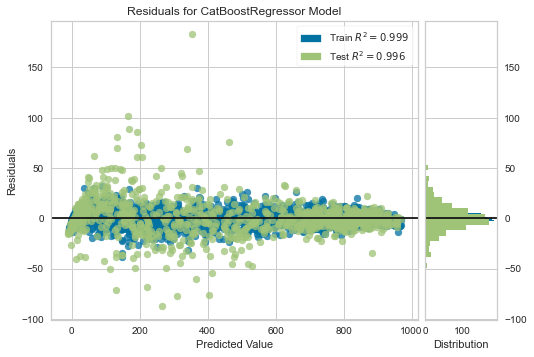

In [44]:
#Residuals
plot_model(best)

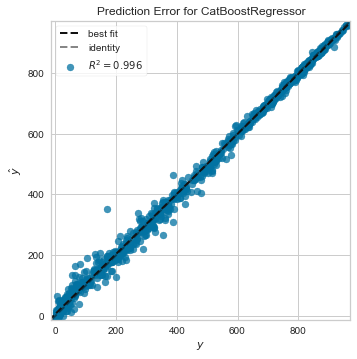

In [45]:
#Errors
plot_model(best, plot ='error')

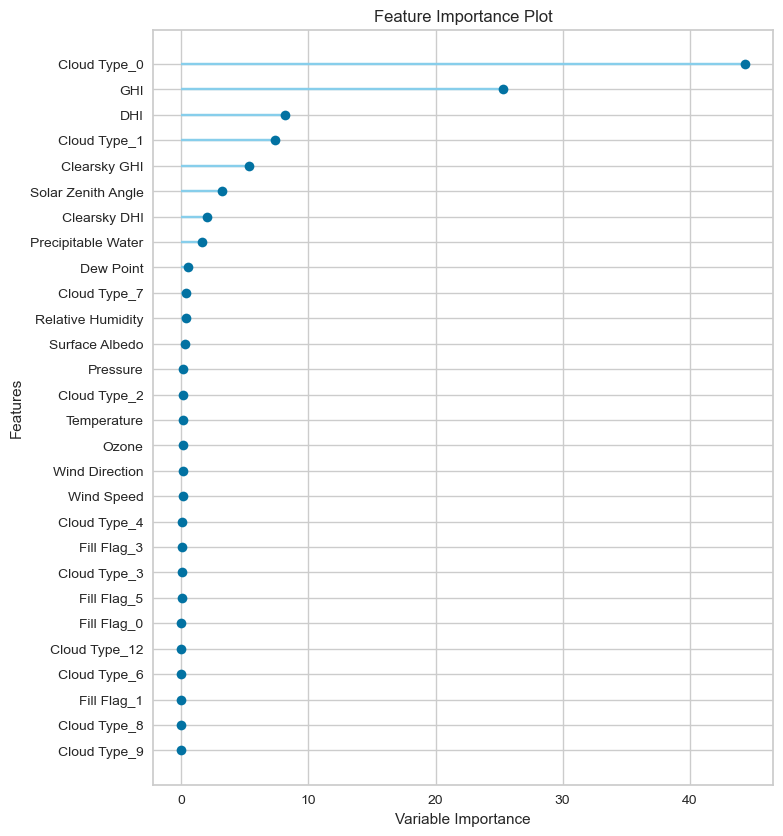

In [46]:
#All features and their value. As you can see a lot of them has got 0 contribution or like 0
#So we are aiming reduce number of inputs. But first lets use other combination on our data
plot_model(best, plot='feature_all')

In [47]:
#Normalized dataset didnt improve our results.
reg = setup(data=data,
           target='DNI',
           use_gpu = True,
           normalize=True,
           session_id = 123)

,Description,Value
0,session_id,123
1,Target,DNI
2,Original Data,"(3009, 17)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2106, 28)"


In [48]:
#Error values increased
best = compare_models(exclude=['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,13.7518,473.5767,21.5337,0.9949,0.3168,0.2548,1.5330
lightgbm,Light Gradient Boosting Machine,16.2283,645.5487,25.2017,0.9931,0.2822,0.2129,0.1010
et,Extra Trees Regressor,15.9628,757.5132,27.0836,0.9919,0.3140,0.2435,0.5500
xgboost,Extreme Gradient Boosting,18.4294,824.3552,28.5184,0.9912,0.2998,0.2070,0.6350
rf,Random Forest Regressor,19.4816,1012.1251,31.6352,0.9892,0.3000,0.2314,0.5460
gbr,Gradient Boosting Regressor,25.5880,1302.2516,35.9081,0.9861,0.4517,0.5272,0.4350
dt,Decision Tree Regressor,30.2281,2252.5885,46.8666,0.9758,0.3398,0.2143,0.0220
ada,AdaBoost Regressor,64.2650,5889.9831,76.6345,0.9376,0.8214,1.8243,0.2400
lr,Linear Regression,62.5436,6655.6563,81.5208,0.9293,0.7327,1.3585,0.0070
br,Bayesian Ridge,62.5950,6654.2321,81.5118,0.9293,0.7351,1.3580,0.0090


In [49]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.0435,544.9099,23.3433,0.9940,0.3277,0.2639
1,12.0727,342.5230,18.5074,0.9965,0.2448,0.1747
2,11.3753,346.9230,18.6259,0.9966,0.3773,0.3437
3,14.7498,555.2340,23.5634,0.9936,0.2465,0.1492
4,12.5937,340.1738,18.4438,0.9966,0.3491,0.3041
5,14.9811,658.5198,25.6616,0.9933,0.3270,0.2075
6,11.8180,307.6520,17.5400,0.9968,0.2901,0.2926
7,14.9027,465.0870,21.5659,0.9950,0.3066,0.2611
8,16.0764,734.1895,27.0959,0.9920,0.3697,0.2760
9,13.9050,440.5546,20.9894,0.9949,0.3291,0.2748


In [50]:
print(catboost.feature_names_ )

['Temperature', 'Clearsky DHI', 'Clearsky GHI', 'Dew Point', 'DHI', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Cloud Type_0', 'Cloud Type_1', 'Cloud Type_12', 'Cloud Type_2', 'Cloud Type_3', 'Cloud Type_4', 'Cloud Type_6', 'Cloud Type_7', 'Cloud Type_8', 'Cloud Type_9', 'Fill Flag_0', 'Fill Flag_1', 'Fill Flag_3', 'Fill Flag_5']


In [51]:
#tune model with optimum hypermeters. Using Random Grid Search
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.4315,1181.1411,34.3677,0.9870,0.4990,0.5529
1,23.4136,999.1782,31.6098,0.9899,0.4088,0.3573
2,20.3063,770.8780,27.7647,0.9924,0.4226,0.4038
3,26.3028,1337.2091,36.5679,0.9846,0.2966,0.2094
4,24.3101,1118.7985,33.4484,0.9887,0.4120,0.4244
5,27.3395,1528.7604,39.0994,0.9845,0.4140,0.3734
6,25.5733,1416.1762,37.6321,0.9855,0.4599,0.5022
7,23.5536,986.6998,31.4118,0.9893,0.4677,0.5912
8,26.7728,1527.3397,39.0812,0.9834,0.5468,0.7704
9,27.1183,1448.8510,38.0638,0.9834,0.4517,0.4667


In [52]:
#Our best parameters
print(tuned_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


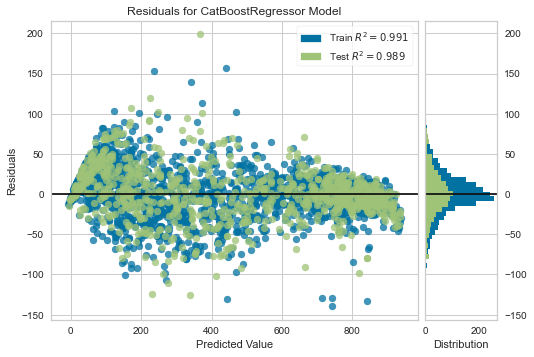

In [53]:
plot_model(tuned_catboost)

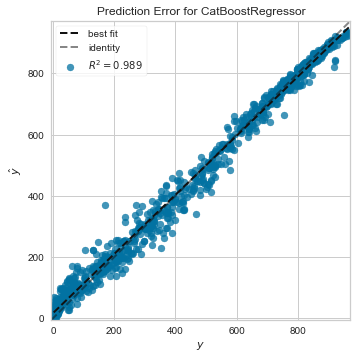

In [54]:
plot_model(tuned_catboost, plot = 'error')

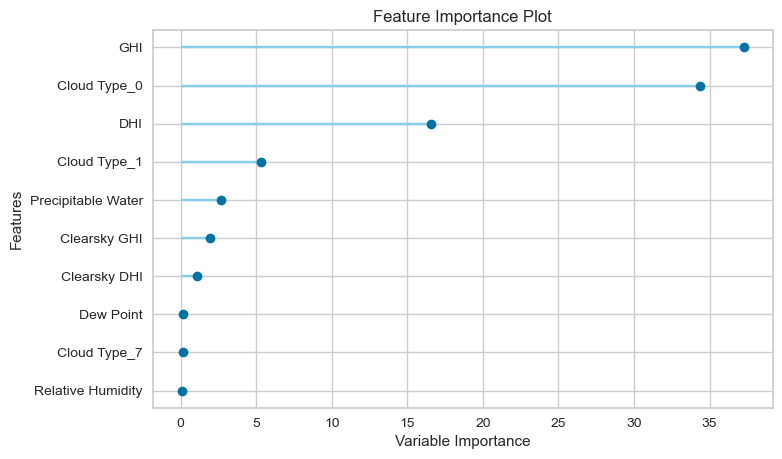

In [55]:
plot_model(tuned_catboost, plot='feature')

In [56]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [57]:
final_catboost = finalize_model(tuned_catboost)

In [58]:
print(final_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


In [59]:
final_catboost.feature_names_

['Temperature',
 'Clearsky DHI',
 'Clearsky GHI',
 'Dew Point',
 'DHI',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Surface Albedo',
 'Pressure',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_12',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9',
 'Fill Flag_0',
 'Fill Flag_1',
 'Fill Flag_3',
 'Fill Flag_5']

In [60]:
#Saving results
predict_model(final_catboost, data=data_unseen)
normalize_results=predict_model(final_catboost, data=data_unseen)
normalize_results.to_csv('predictwithnormalize.csv', index=False)

In [61]:
final_catboost.feature_names_ 

['Temperature',
 'Clearsky DHI',
 'Clearsky GHI',
 'Dew Point',
 'DHI',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Surface Albedo',
 'Pressure',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_12',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9',
 'Fill Flag_0',
 'Fill Flag_1',
 'Fill Flag_3',
 'Fill Flag_5']

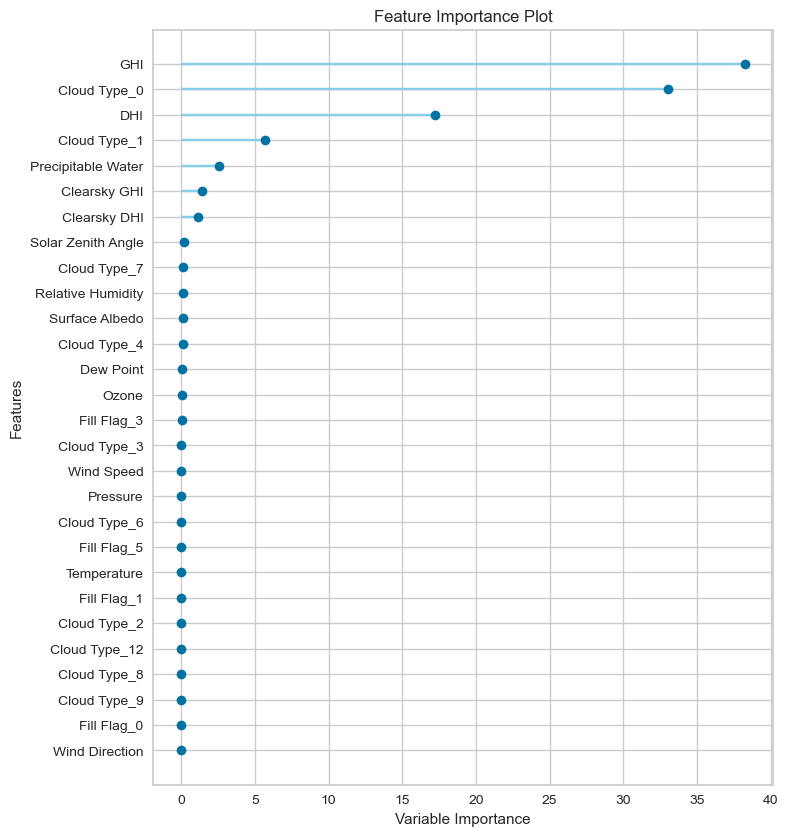

In [62]:
plot_model(final_catboost, plot='feature_all')

In [63]:
data.columns

Index(['Temperature', 'Clearsky DHI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [64]:
#removing these features from both validation data and dataset.
data = data.drop(['Fill Flag','Temperature', 'Wind Direction','Wind Speed', 'Pressure'], 1)
data_unseen = data_unseen.drop(['Fill Flag','Temperature', 'Wind Direction','Wind Speed', 'Pressure'], 1)

In [65]:
#Checking shapes to be sure
data.shape

(3009, 12)

In [66]:
#checking column names
data.columns

Index(['Clearsky DHI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Precipitable Water'],
      dtype='object')

In [67]:
#checking again with normal then we'll repeat this with normalize.
reg = setup(data=data,
           target='DNI', session_id = 123)

,Description,Value
0,session_id,123
1,Target,DNI
2,Original Data,"(3009, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2106, 20)"


In [68]:
best = compare_models(exclude=['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,12.8306,412.0124,20.1266,0.9956,0.3185,0.2641,0.4840
lightgbm,Light Gradient Boosting Machine,15.8324,609.6665,24.4870,0.9935,0.2721,0.1981,0.0170
et,Extra Trees Regressor,14.7029,656.4796,25.2805,0.9930,0.2869,0.2128,0.0700
knn,K Neighbors Regressor,17.9967,667.7547,25.8107,0.9929,0.2655,0.1920,0.0070
xgboost,Extreme Gradient Boosting,17.7110,779.8404,27.7150,0.9916,0.2987,0.1971,0.0510
rf,Random Forest Regressor,18.1772,907.9261,29.9410,0.9903,0.2771,0.2029,0.0930
gbr,Gradient Boosting Regressor,25.4805,1293.6742,35.7716,0.9862,0.4460,0.5241,0.0460
dt,Decision Tree Regressor,28.6054,2219.6896,46.3899,0.9761,0.3233,0.2030,0.0070
ada,AdaBoost Regressor,64.4992,5989.1758,77.2923,0.9365,0.8241,1.8098,0.0290
lr,Linear Regression,65.3682,7180.5480,84.6752,0.9237,0.7217,1.3569,0.0050


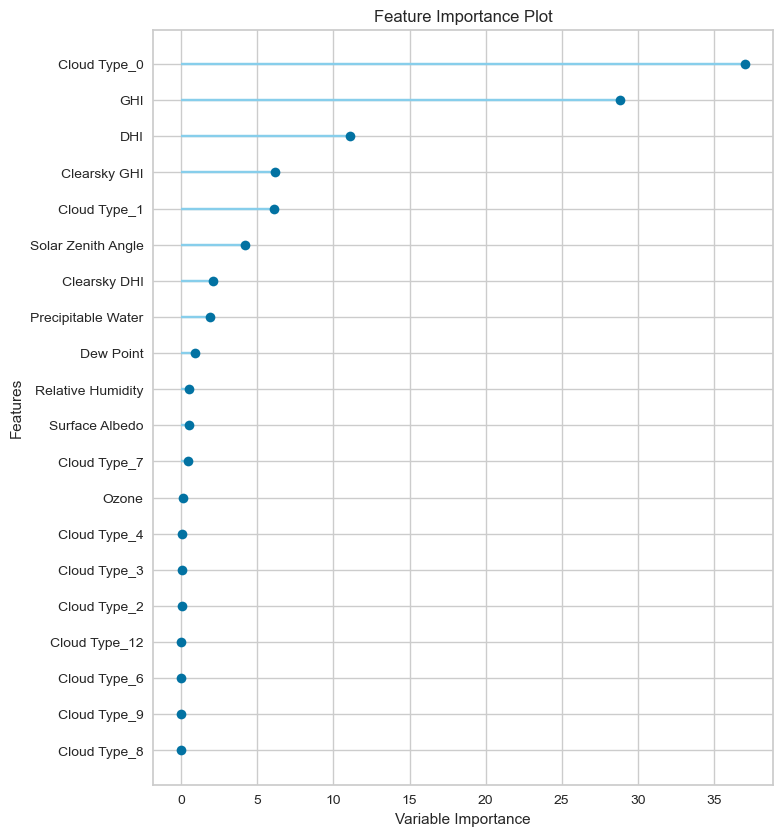

In [69]:
plot_model(best, plot='feature_all')

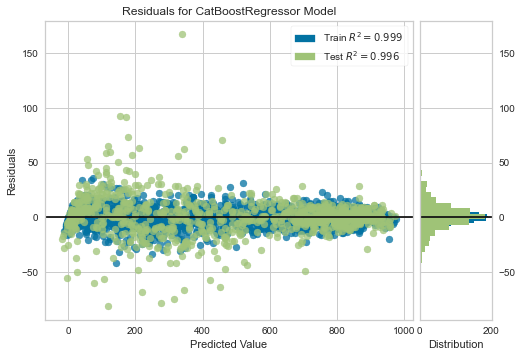

In [70]:
plot_model(best)

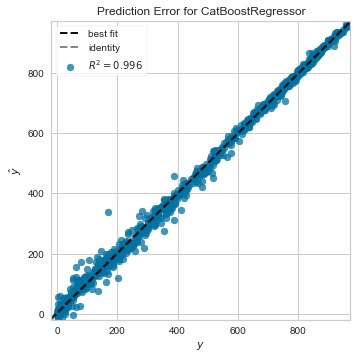

In [71]:
plot_model(best, plot='error')

In [72]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [73]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13.2450,404.7077,20.1173,0.9955,0.3192,0.2734
1,12.0000,366.1779,19.1358,0.9963,0.3210,0.2497
2,11.6392,344.1611,18.5516,0.9966,0.3533,0.3057
3,14.8988,506.1606,22.4980,0.9942,0.2303,0.1579
4,12.0691,297.3536,17.2439,0.9970,0.3141,0.2874
5,14.2135,597.9320,24.4526,0.9940,0.2931,0.2083
6,10.5355,258.1051,16.0656,0.9973,0.3107,0.3057
7,12.7217,363.4781,19.0651,0.9961,0.3396,0.3395
8,14.1910,579.7314,24.0776,0.9937,0.3933,0.2909
9,12.7921,402.3166,20.0578,0.9954,0.3107,0.2228


In [74]:
tuned_catboost = tune_model(catboost)
print(tuned_catboost.get_params())

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.1613,1154.4737,33.9775,0.9873,0.4948,0.5727
1,23.5743,1029.2683,32.0822,0.9896,0.4046,0.3561
2,19.8648,750.7806,27.4004,0.9926,0.4001,0.3808
3,25.8912,1214.7029,34.8526,0.9860,0.3067,0.2255
4,24.5092,1109.3125,33.3063,0.9888,0.3930,0.4094
5,27.3822,1550.5904,39.3775,0.9843,0.4028,0.3492
6,24.5542,1298.6616,36.0369,0.9867,0.4774,0.5109
7,23.3948,950.6615,30.8328,0.9897,0.4621,0.5238
8,26.1351,1405.0548,37.4841,0.9847,0.5391,0.7041
9,26.9245,1468.4967,38.3210,0.9831,0.4361,0.4649


{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


In [75]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [76]:
final_catboost = finalize_model(tuned_catboost)

In [77]:
predict_model(final_catboost, data=data_unseen)

,Clearsky DHI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Precipitable Water,Label
date_time,,,,,,,,,,,,,
2017-01-01 12:30:00,91,298,4,0.0,113,14,118,0.331,73.54,72.05,0.87,0.8,58.871473
2017-01-03 10:30:00,95,435,2,2.7,191,154,259,0.292,72.34,64.03,0.12,1.0,167.604677
2017-01-13 13:30:00,53,200,0,1.4,53,673,200,0.292,71.98,77.39,0.87,1.0,583.300379
2017-01-14 14:30:00,29,43,8,5.7,25,61,30,0.314,83.96,85.97,0.87,1.7,61.268189
2017-01-15 14:30:00,34,42,1,3.8,34,109,42,0.393,90.61,85.78,0.87,1.2,155.832436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-11 09:30:00,76,431,0,7.1,76,822,431,0.317,64.40,64.38,0.11,1.2,816.571204
2017-12-13 08:30:00,78,365,7,10.7,146,329,272,0.301,80.99,67.37,0.11,1.6,303.260476
2017-12-15 08:30:00,75,366,0,10.7,75,762,366,0.275,79.02,67.55,0.11,1.6,738.486474


In [78]:
#saving results as csv so we can check it later.
normalize_results=predict_model(final_catboost, data=data_unseen)
normalize_results.to_csv('lessinputs.csv', index=False)

In [83]:
print(final_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


In [84]:
final_catboost.feature_names_

['Clearsky DHI',
 'Clearsky GHI',
 'Dew Point',
 'DHI',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Surface Albedo',
 'Precipitable Water',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_12',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9']

In [85]:
#import pickle for model deployment
import pickle
model =final_catboost

In [86]:
with open ('validatedlastversion','wb') as file:
    pickle.dump(model, file)